# 0. 匯入資料、讀取套件與資料前處理

In [ ]:
# HW1: https://drive.google.com/file/d/1zU90PKISPvV0WfilNsqZ3ixSxA0rAYS7/view?usp=sharing
# HW2: https://drive.google.com/file/d/1_oaqW5Z9LyQLd9h-FC0Ktzw7lBsfOQn3/view?usp=sharing
# HW3: https://drive.google.com/file/d/1hxbYS0ZUW_MlRSMCnZQh2_TDgcxkIwhT/view?usp=sharing
# HW4: https://drive.google.com/file/d/1kvMCbRy1O-w2LhtkLbjowE8_gdX5b07T/view?usp=sharing
# HW5: https://drive.google.com/file/d/17veGwB_XZgZWacaydUNk8inVzTii63jK/view?usp=sharing
# HW6: https://drive.google.com/file/d/1sFwE2Vnll-xAy2aDz3pz_fq5-QwE5gJg/view?usp=sharing
# Score: https://drive.google.com/file/d/1wP5KgFCfL1xYg11roqN_kS7sbsQGSYBK/view?usp=sharing
!gdown --id "1zU90PKISPvV0WfilNsqZ3ixSxA0rAYS7"
!gdown --id "1_oaqW5Z9LyQLd9h-FC0Ktzw7lBsfOQn3"
!gdown --id "1hxbYS0ZUW_MlRSMCnZQh2_TDgcxkIwhT"
!gdown --id "1kvMCbRy1O-w2LhtkLbjowE8_gdX5b07T"
!gdown --id "17veGwB_XZgZWacaydUNk8inVzTii63jK"
!gdown --id "1sFwE2Vnll-xAy2aDz3pz_fq5-QwE5gJg"
!gdown --id "1wP5KgFCfL1xYg11roqN_kS7sbsQGSYBK"

Downloading...
From: https://drive.google.com/uc?id=1zU90PKISPvV0WfilNsqZ3ixSxA0rAYS7
To: /content/PWS Homework 1.csv
100% 256k/256k [00:00<00:00, 72.3MB/s]
Downloading...
From: https://drive.google.com/uc?id=1_oaqW5Z9LyQLd9h-FC0Ktzw7lBsfOQn3
To: /content/PWS Homework 2.csv
100% 60.4k/60.4k [00:00<00:00, 22.7MB/s]
Downloading...
From: https://drive.google.com/uc?id=1hxbYS0ZUW_MlRSMCnZQh2_TDgcxkIwhT
To: /content/PWS Homework 3.csv
100% 149k/149k [00:00<00:00, 43.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=1kvMCbRy1O-w2LhtkLbjowE8_gdX5b07T
To: /content/PWS Homework 4.csv
100% 166k/166k [00:00<00:00, 49.2MB/s]
Downloading...
From: https://drive.google.com/uc?id=17veGwB_XZgZWacaydUNk8inVzTii63jK
To: /content/PWS Homework 5.csv
100% 141k/141k [00:00<00:00, 48.0MB/s]
Downloading...
From: https://drive.google.com/uc?id=1sFwE2Vnll-xAy2aDz3pz_fq5-QwE5gJg
To: /content/PWS Homework 6.csv
100% 165k/165k [00:00<00:00, 64.2MB/s]
Downloading...
From: https://drive.google.com/uc?id=1wP5

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import dates
from datetime import datetime
import seaborn as sns
# import statsmodels.formula.api as sm
import warnings
warnings.simplefilter("ignore")
pd.options.display.float_format = '{:,.2f}'.format
sns.set_context("talk")

In [ ]:
Score = pd.read_excel('PWS Score.xlsx', sheet_name=None)

In [ ]:
def get_df():
  # Step1. 讀入資料&加入欄位
  raw_data = pd.concat([pd.read_csv('PWS Homework 1.csv', header=None, parse_dates = [0]), 
                        pd.read_csv('PWS Homework 2.csv', header=None, parse_dates = [0]),
                        pd.read_csv('PWS Homework 3.csv', header=None, parse_dates = [0]),
                        pd.read_csv('PWS Homework 4.csv', header=None, parse_dates = [0]),
                        pd.read_csv('PWS Homework 5.csv', header=None, parse_dates = [0]),
                        pd.read_csv('PWS Homework 6.csv', header=None, parse_dates = [0])], ignore_index=False)
  
  raw_data.columns = ['When', 'ID', 'Status', 'Problem', 'Time', 'Memory', 'Language', 'Author', 'Homework']
  raw_data.sort_values("When", ascending=True, inplace=True)
  raw_data['Problem'] = raw_data['Problem'].astype(str)

  # Step2. 刪去AC後的Submission
  data_list = raw_data.values.tolist()
  ac_list = []
  df_list = []
  for data in data_list:
    if [data[3], data[7], data[8]] not in ac_list:  # 這題還沒AC過
      df_list.append(data)
      if data[2] == "Accepted":  # 代表這題AC過了，之後的繳交資料都會刪掉
        ac_list.append([data[3], data[7], data[8]])
  # Step3. 將List轉成pandas dataframe
  df = pd.DataFrame.from_dict(df_list)
  df.columns = ['When', 'ID', 'Status', 'Problem', 'Time', 'Memory', 'Language', 'Author', 'Homework']
  df.set_index('ID', inplace=True)
  return df

# df: 每一次作業的資料List(已去除第一次AC後重複繳交的資料)
df = get_df()
df = df[~df['Author'].isin(['b06302345@ntu.edu.tw', 'hyusterr', 'jeffery12697', 'yeutong00'])]  # 刪掉非學號資料
df['Homework'] = df['Homework'].str.get(-1)
df['Problem'] = df['Homework'].str.get(-1) + '-' + df['Problem'].str.get(-1)
df['Grade'] = df['Author'].str.slice(start=0, stop=3)  # 學號前三碼看學院
df['Department'] = df['Author'].str.get(3)  # 學號第四碼看年級
df['Date'] = df['When'].dt.date
df['Hour'] = df['When'].dt.hour
df['Homework'] = df['Homework'].astype(int)
df

,When,Status,Problem,Time,Memory,Language,Author,Homework,Grade,Department,Date,Hour
ID,,,,,,,,,,,,
4c277d478631,2021-02-24 13:34:58,Wrong Answer,1-1,23ms,8MB,Python3,b06502168,1,b06,5,2021-02-24,13
f8f9812971d1,2021-02-24 13:40:11,Wrong Answer,1-1,28ms,8MB,Python3,b06502168,1,b06,5,2021-02-24,13
126e5dc88c94,2021-02-24 13:46:53,Accepted,1-1,21ms,8MB,Python3,b07705031,1,b07,7,2021-02-24,13
f0ea2cf9c697,2021-02-24 13:48:40,Compile Error,1-1,--,--,Python3,b06702026,1,b06,7,2021-02-24,13
e44598ff19d6,2021-02-24 13:49:08,Runtime Error,1-1,20ms,8MB,Python3,b06702026,1,b06,7,2021-02-24,13
...,...,...,...,...,...,...,...,...,...,...,...,...
ddbd5a60f94f,2021-05-24 07:46:58,Runtime Error,6-4,23ms,8MB,Python3,r08627021,6,r08,6,2021-05-24,7
ba0d056e7854,2021-05-24 07:49:31,Runtime Error,6-4,24ms,8MB,Python3,r08627021,6,r08,6,2021-05-24,7
4c6fe4811ec9,2021-05-24 07:53:16,Runtime Error,6-4,17ms,8MB,Python3,r08627021,6,r08,6,2021-05-24,7


# 1. 提交作業順序對分數的影響

In [ ]:
dfs = [None]  # 1~6分別裝每次作業的df
ac_dfs = [None]  # 1~6分別裝每次作業的ac_df
first_dfs = [None]  # 1~6分別裝每次作業的first_df
for i in range(1, 7):  # 讀入資料
  hw_i = df[df['Homework'] == i]
  ac_df_i = hw_i[hw_i['Status'] == "Accepted"].drop_duplicates(subset=['Author'])
  first_df_i = hw_i.drop_duplicates(subset=['Author'])
  dfs.append(hw_i)
  ac_dfs.append(ac_df_i)
  first_dfs.append(first_df_i)

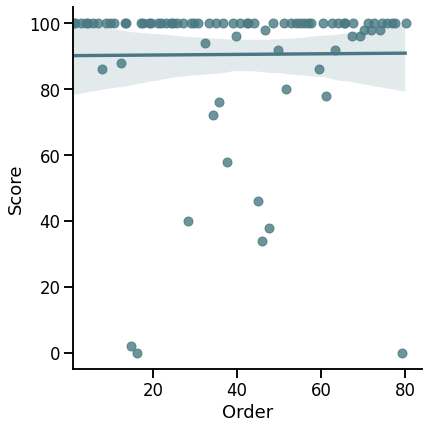

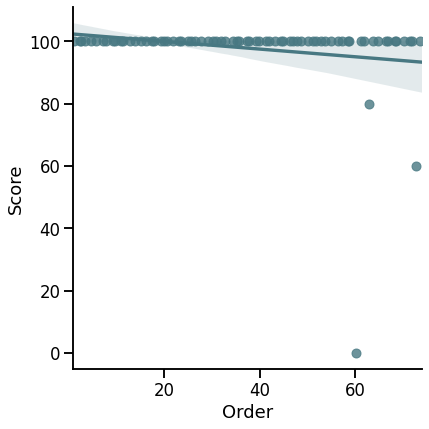

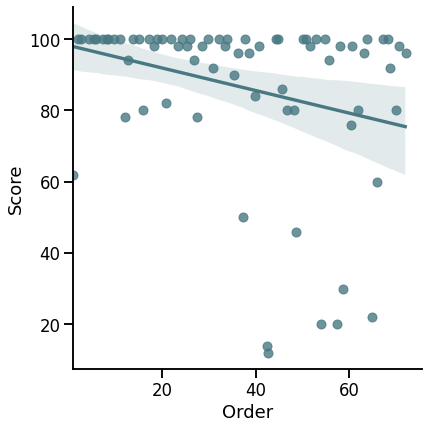

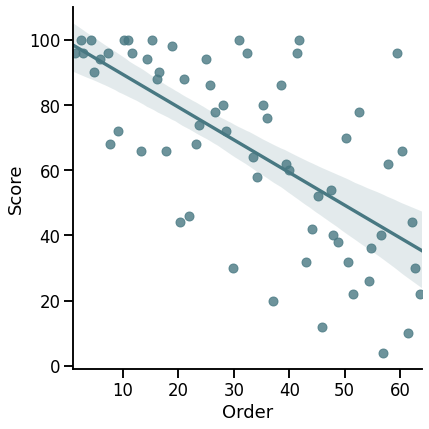

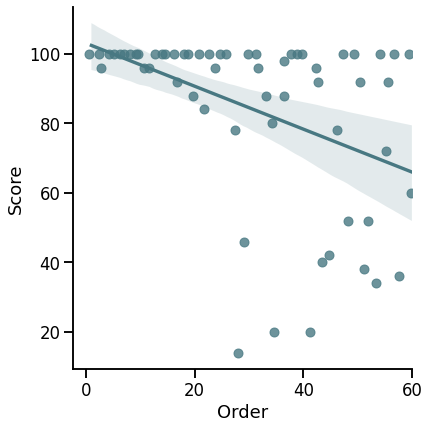

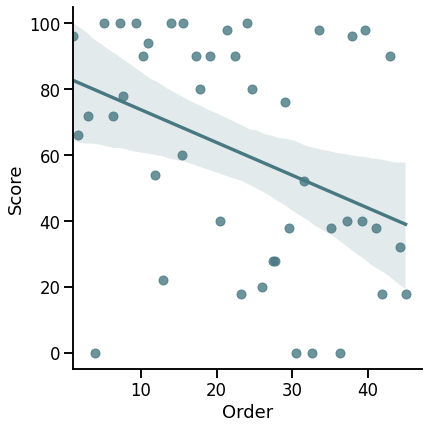

In [ ]:
order_ac = [None]
for n in range(1, 7):
  first_dfs[n]['Order'] = first_dfs[n].When.rank(method='min', ascending=True)
  order = first_dfs[n].merge(Score['HW{}'.format(n)], left_on='Author', right_on='User')
  order = order[['Author', 'When', 'Order', 'Total Score']]
  order.columns = ['Author', 'When', 'Order', 'Score']
  order['Day'] = (order['When'] - min(order['When'])).dt.days
  order.set_index('Author', inplace=True)
  order_ac.append(order)
  sns.lmplot(x='Order', y='Score', data=order, fit_reg=True, height=6, aspect=1, x_jitter=0.5)
  plt.show()

# 2. 繳交作業順序之間的相關性

In [ ]:
order = order_ac[1]
order = order.merge(order_ac[2], how='outer', left_index=True, right_index=True, suffixes=('_1', '_2'))
order = order.merge(order_ac[3], how='outer', left_index=True, right_index=True)
order = order.merge(order_ac[4], how='outer', left_index=True, right_index=True, suffixes=('_3', '_4'))
order = order.merge(order_ac[5], how='outer', left_index=True, right_index=True)
order = order.merge(order_ac[6], how='outer', left_index=True, right_index=True, suffixes=('_5', '_6'))
order.sort_values(['Order_{}'.format(n) for n in range(1, 7)], inplace=True)
order_fin = order.dropna(subset=['Score_5'])
order.head(3)

,When_1,Order_1,Score_1,Day_1,When_2,Order_2,Score_2,Day_2,When_3,Order_3,Score_3,Day_3,When_4,Order_4,Score_4,Day_4,When_5,Order_5,Score_5,Day_5,When_6,Order_6,Score_6,Day_6
Author,,,,,,,,,,,,,,,,,,,,,,,,
b06502168,2021-02-24 13:34:58,1.00,100.00,0.00,2021-03-10 13:37:18,5.00,100.00,0.00,2021-03-22 13:00:50,2.00,100.00,0.00,2021-04-07 11:34:01,11.00,100.00,1.00,2021-04-22 17:34:06,10.00,100.00,0.00,2021-05-09 01:02:03,9.00,100.00,1.00
b07705031,2021-02-24 13:46:53,2.00,100.00,0.00,2021-03-10 16:42:04,8.00,100.00,0.00,2021-03-22 19:44:01,8.00,100.00,0.00,2021-04-06 11:51:48,4.00,100.00,0.00,2021-04-24 15:37:57,15.00,100.00,2.00,2021-05-10 10:37:22,14.00,100.00,2.00
b06702026,2021-02-24 13:48:40,3.00,100.00,0.00,2021-03-09 21:09:03,1.00,100.00,0.00,2021-03-22 15:51:38,3.00,100.00,0.00,2021-04-05 20:42:21,1.00,96.00,0.00,2021-04-21 19:13:03,1.00,100.00,0.00,2021-05-07 15:48:51,3.00,72.00,0.00


In [ ]:
when = order[['When_1', 'When_2', 'When_3', 'When_4', 'When_5', 'When_6']]
when['HW1'] = (when['When_1'] - min(when['When_1'])).dt.days
when['HW2'] = (when['When_2'] - min(when['When_2'])).dt.days
when['HW3'] = (when['When_3'] - min(when['When_3'])).dt.days
when['HW4'] = (when['When_4'] - min(when['When_4'])).dt.days
when['HW5'] = (when['When_5'] - min(when['When_5'])).dt.days
when['HW6'] = (when['When_6'] - min(when['When_6'])).dt.days

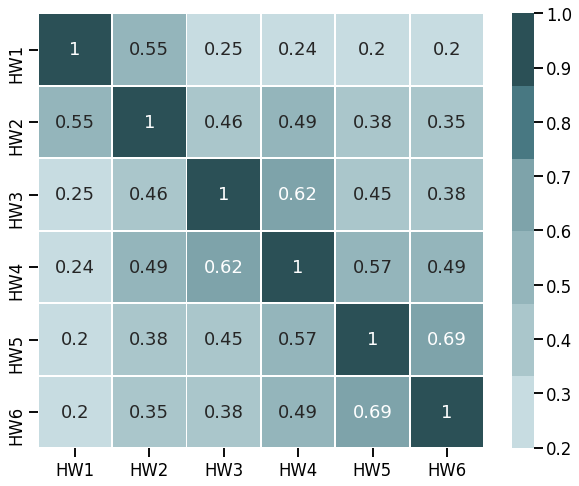

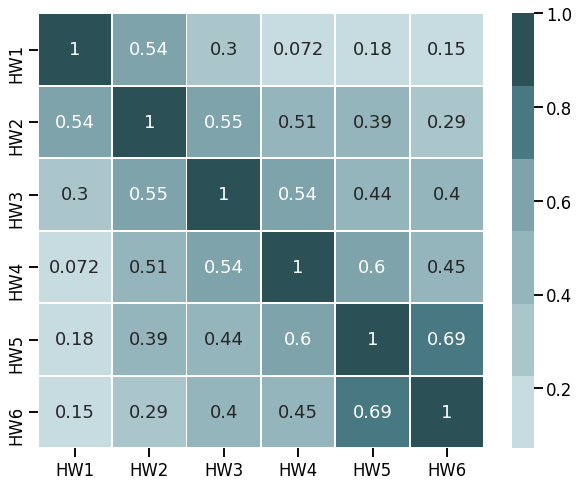

In [ ]:
# 上圖是以順序計算，下圖是以日期(第幾天)計算
# ["#2B5056", "#487882", "#7EA3AA", "#94B5BB", "#AAC6CB", "#C7DCE1", "#E288B3", "#EAA6C6"]
fig, ax = plt.subplots(1,1,figsize=(10, 8))
o = order_fin[['Order_1', 'Order_2', 'Order_3', 'Order_4', 'Order_5', 'Order_6']]
o.columns = ['HW1', 'HW2', 'HW3', 'HW4', 'HW5', 'HW6']
sns.heatmap(o.corr(),
            annot=True, cmap=["#C7DCE1", "#AAC6CB", "#94B5BB", "#7EA3AA", "#487882", "#2B5056"], linewidth=1, linecolor='w', ax=ax)
plt.show()

fig, ax = plt.subplots(1,1,figsize=(10, 8))
sns.heatmap(when[['HW1', 'HW2', 'HW3', 'HW4', 'HW5', 'HW6']].corr(),
            annot=True, cmap=["#C7DCE1", "#AAC6CB", "#94B5BB", "#7EA3AA", "#487882", "#2B5056"], linewidth=1, linecolor='w', ax=ax)
plt.show()

# 3. 修課學生年級、學院分布

In [ ]:
students = pd.DataFrame(df.drop_duplicates(subset=['Author', 'Homework'])\
                            .value_counts('Author'))
student_list = students[students[0] >= 5].index.tolist()
df = df[df['Author'].isin(student_list)]
df

,When,Status,Problem,Time,Memory,Language,Author,Homework,Grade,Department,Date,Hour
ID,,,,,,,,,,,,
4c277d478631,2021-02-24 13:34:58,Wrong Answer,1-1,23ms,8MB,Python3,b06502168,1,b06,5,2021-02-24,13
f8f9812971d1,2021-02-24 13:40:11,Wrong Answer,1-1,28ms,8MB,Python3,b06502168,1,b06,5,2021-02-24,13
126e5dc88c94,2021-02-24 13:46:53,Accepted,1-1,21ms,8MB,Python3,b07705031,1,b07,7,2021-02-24,13
f0ea2cf9c697,2021-02-24 13:48:40,Compile Error,1-1,--,--,Python3,b06702026,1,b06,7,2021-02-24,13
e44598ff19d6,2021-02-24 13:49:08,Runtime Error,1-1,20ms,8MB,Python3,b06702026,1,b06,7,2021-02-24,13
...,...,...,...,...,...,...,...,...,...,...,...,...
ddbd5a60f94f,2021-05-24 07:46:58,Runtime Error,6-4,23ms,8MB,Python3,r08627021,6,r08,6,2021-05-24,7
ba0d056e7854,2021-05-24 07:49:31,Runtime Error,6-4,24ms,8MB,Python3,r08627021,6,r08,6,2021-05-24,7
4c6fe4811ec9,2021-05-24 07:53:16,Runtime Error,6-4,17ms,8MB,Python3,r08627021,6,r08,6,2021-05-24,7


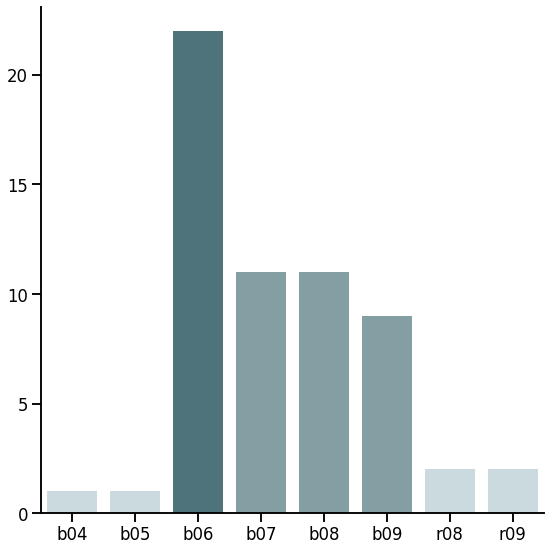

In [ ]:
# colors = ["#2B5056", "#487882", "#7EA3AA", "#94B5BB", "#AAC6CB", "#C7DCE1", "#E288B3", "#EAA6C6"]
palette_a = ["#C7DCE1", "#C7DCE1", "#487882", "#7EA3AA", "#7EA3AA", "#7EA3AA", "#C7DCE1", "#C7DCE1"]
sns.catplot(data=pd.DataFrame(df.groupby('Grade').Author.nunique()).reset_index(),
            x='Grade', y='Author', kind='bar', palette=palette_a,
            height=8, aspect=1)
plt.xlabel('')
plt.ylabel('')
plt.show()

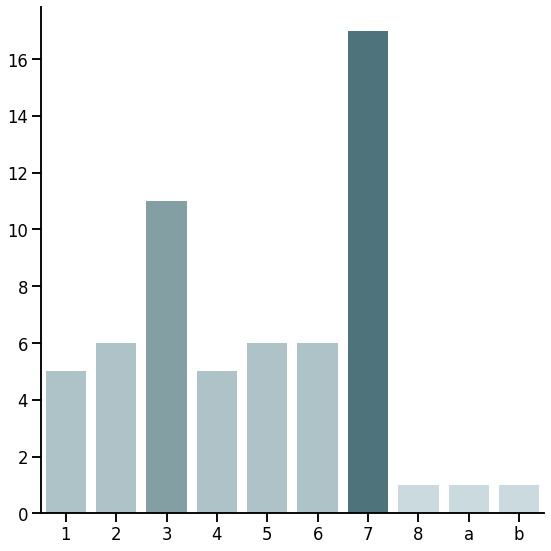

In [ ]:
# colors = ["#2B5056", "#487882", "#7EA3AA", "#94B5BB", "#AAC6CB", "#C7DCE1", "#E288B3", "#EAA6C6"]
palette_b = ["#AAC6CB", "#AAC6CB", "#7EA3AA", "#AAC6CB", "#AAC6CB", "#AAC6CB", "#487882", "#C7DCE1", "#C7DCE1", "#C7DCE1"]
sns.catplot(data=pd.DataFrame(df.groupby('Department').Author.nunique()).reset_index(),
            x='Department', y='Author', kind='bar', palette=palette_b,
            height=8, aspect=1)
plt.xlabel('')
plt.ylabel('')
plt.show()

# 4. 每位同學提交作業的時間分布

In [ ]:
# pd.DataFrame(df.groupby('Author').Hour()).reset_index()
day_night = pd.crosstab(df.Author, df.Hour, margins=True)[:-1]
day_night['Day'] = day_night[[6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]].sum(axis=1)
day_night['Night'] = day_night[[18, 19, 20, 21, 22, 23, 0, 1, 2, 3, 4, 5]].sum(axis=1)
day_night['Night_rate'] = day_night['Night'] / day_night['All']
day_night.sort_values('Night_rate', inplace=True)

In [ ]:
display((day_night['Night_rate'] <= 0.5).sum())
display((day_night['Night_rate'] > 0.5).sum())
day_night[day_night['All'] >= 50]

22

37

Hour,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,All,Day,Night,Night_rate
Author,,,,,,,,,,,,,,,,,,,,,,,,,,,,
b08403006,2,7,3,0,0,0,0,0,7,31,12,13,6,7,0,2,5,13,0,0,2,0,2,0,112,96,16,0.14
b06404008,0,1,0,0,0,0,0,0,1,22,13,11,3,5,9,39,54,49,11,3,3,15,9,10,258,206,52,0.20
b06502026,0,0,0,0,0,0,0,0,0,2,2,6,7,0,9,25,18,19,2,8,1,7,4,4,114,88,26,0.23
b06703017,0,0,0,0,0,0,0,0,4,4,4,2,9,12,14,14,5,10,3,3,4,6,8,3,105,78,27,0.26
b08303051,0,0,0,0,0,0,0,0,0,9,35,14,5,0,7,4,6,0,3,4,11,3,9,0,110,80,30,0.27
b07705031,2,0,0,0,0,0,0,0,6,1,4,6,1,2,0,4,17,7,1,2,6,4,2,3,68,48,20,0.29
b07801014,2,0,0,0,0,0,0,0,0,2,7,12,5,1,6,10,9,10,6,10,3,3,2,0,88,62,26,0.30
b06703042,7,1,1,0,0,0,0,0,0,2,13,3,5,9,10,12,8,1,1,1,2,8,3,8,95,63,32,0.34
r09741063,0,0,0,0,0,0,0,0,0,7,6,11,6,2,6,0,7,18,8,8,6,5,1,6,97,63,34,0.35


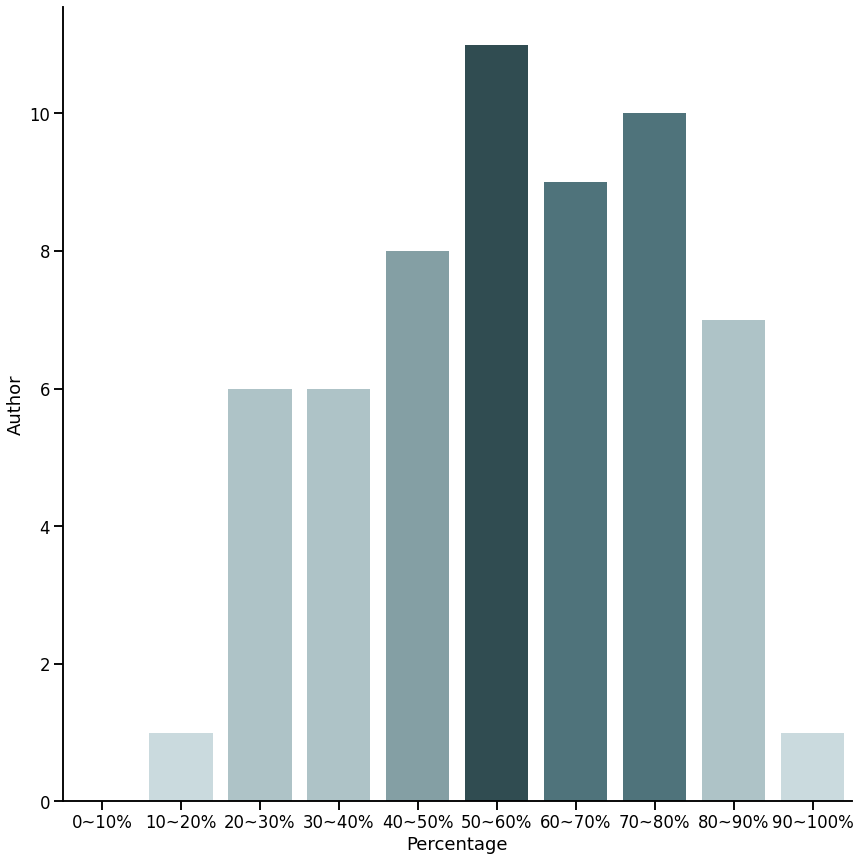

In [ ]:
# colors = ["#2B5056", "#487882", "#7EA3AA", "#94B5BB", "#AAC6CB", "#C7DCE1"]
palette_c = ["#C7DCE1", "#C7DCE1", "#AAC6CB", "#AAC6CB", "#7EA3AA", "#2B5056", "#487882", "#487882", "#AAC6CB", "#C7DCE1"]
day_night_df = pd.DataFrame([['{}~{}%'.format(int(i * 10), int((i+1) * 10)),
                              ((day_night['Night_rate'] >= i/10) & (day_night['Night_rate'] < (i+1)/10)).sum()] for i in range(0, 10)], 
                            columns=['Percentage', 'Author'])
sns.catplot(data=day_night_df,
            x='Percentage', y='Author', kind='bar', palette=palette_c,
            height=12, aspect=1)
plt.show()

# 5. 每次作業的繳交時間、日期分布

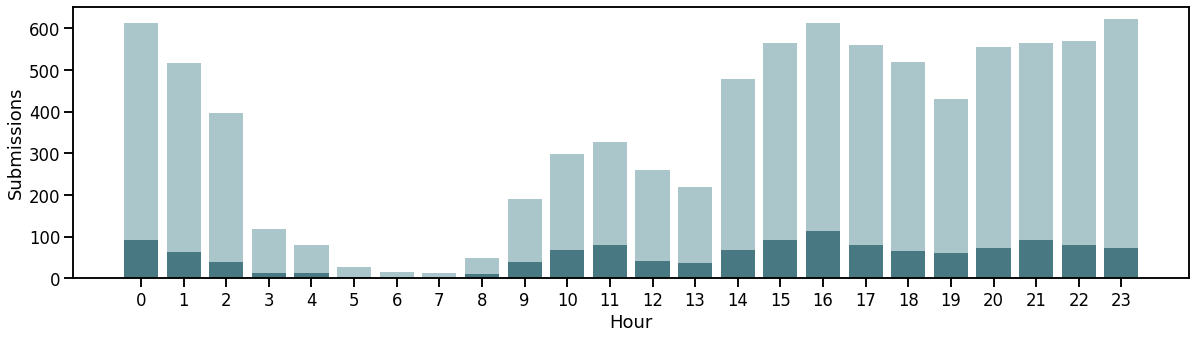

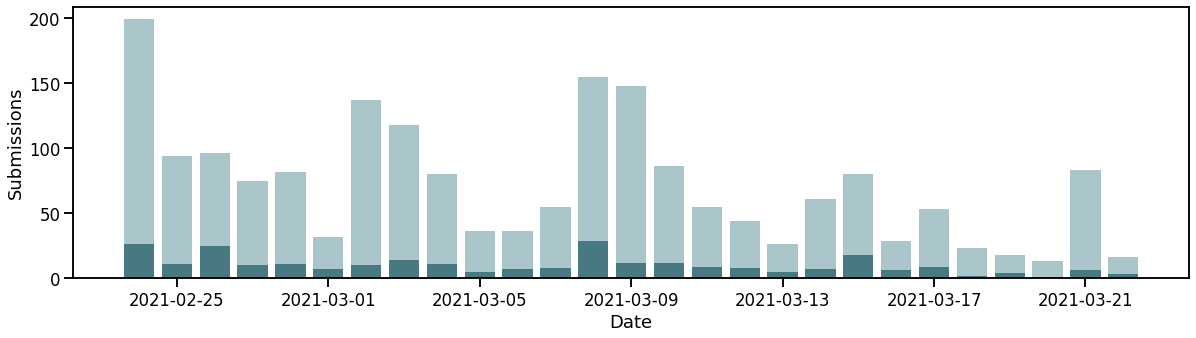

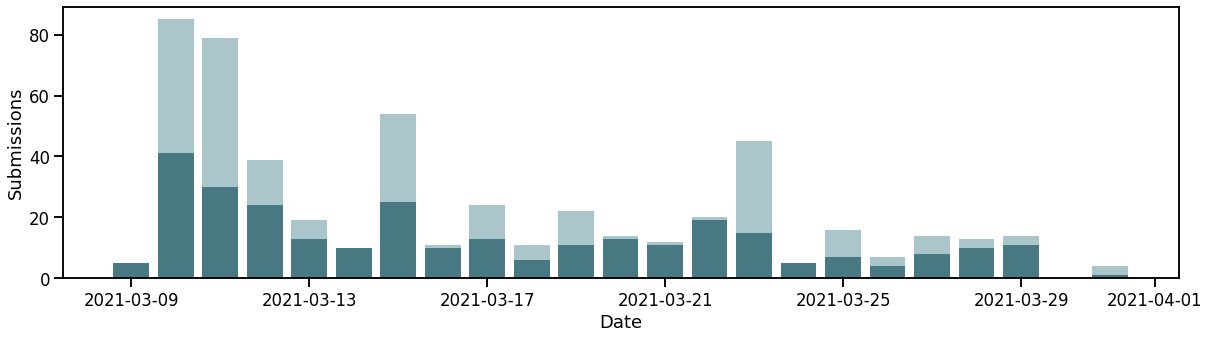

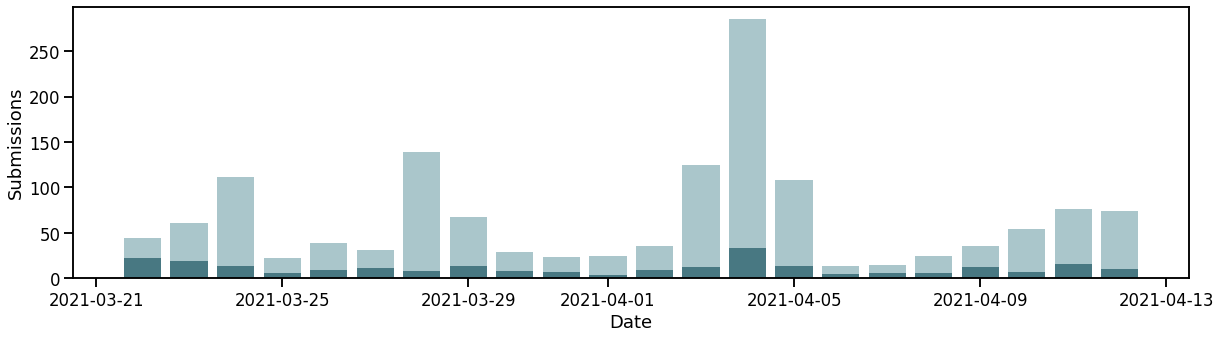

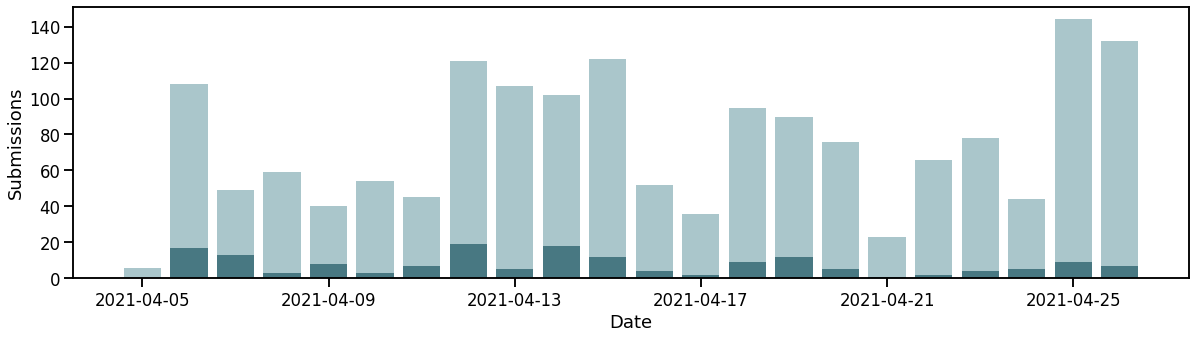

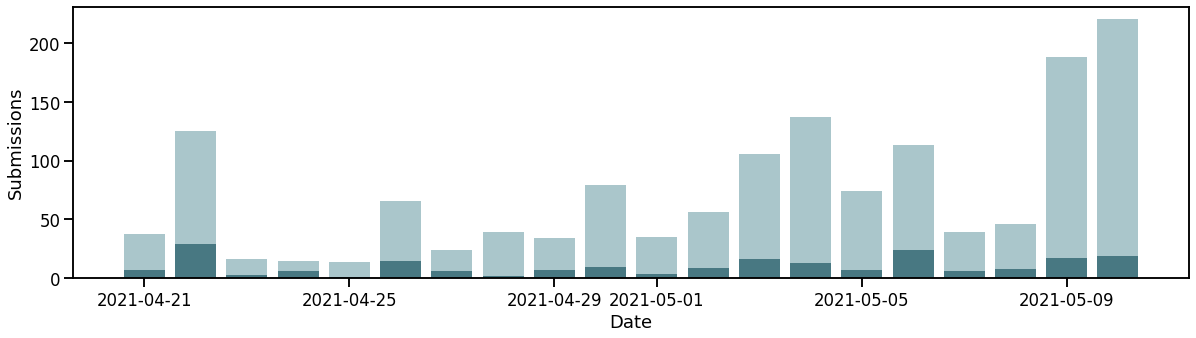

In [ ]:
def get_time_data(df, time='hour'):
  # get_time_data(df)  # 總作業得到幾點的資料
  # get_time_data(df[df["Homework"] == 1], 'date')  # 第一次作業幾月幾號的資料
  if time == 'hour':
    df = pd.crosstab(df['When'].dt.hour, df['Status'])
  elif time == 'date':
    df = pd.crosstab(df['When'].dt.date, df['Status'])
  df['Submission'] = df.sum(axis=1)
  df['Wrong Answer'] = df['Submission'] - df['Accepted']
  df['AC Rate'] = df['Accepted'] / (df['Wrong Answer'] + df['Accepted'])
  df = df.loc[:,['Accepted', 'Wrong Answer', 'Submission', 'AC Rate']]
  df.reset_index(inplace=True)
  return df

def get_time_barplot(df, time='hour'):
  df = get_time_data(df, time)
  fig, ax = plt.subplots(figsize=(20, 5))
  ax.bar(df['When'], df['Accepted'], color='#487882', label='Accepted')
  ax.bar(df['When'], df['Wrong Answer'], bottom=df['Accepted'], color='#AAC6CB', label='Wrong Answer')
  ax.set_ylabel('Submissions')
  if time == 'hour':
    plt.xticks(np.arange(0,24,1))
    ax.set_xlabel('Hour')
  elif time == 'date':
    ax.set_xlabel('Date')
  # plt.legend("")

get_time_barplot(df, 'hour')
for i in range(1, 6):
  get_time_barplot(df[df["Homework"] == i], 'date')